In [196]:
import pandas as pd
import numpy as np

In [197]:
# Loading the data
df = pd.read_json('Ad_Data')

In [198]:
df

,app,bid_price,events,win
0,A,0.01,100000,0
1,A,0.01,0,1
2,A,0.10,7000,0
3,A,0.10,3000,1
4,A,0.20,8000000,0
5,A,0.20,2000000,1
6,A,0.40,700000,0
7,A,0.40,300000,1
8,A,0.50,80000,0
9,A,0.50,20000,1


In [199]:
# Filtering only the winning instances to a new dataframe -> df_win

df_win = df[df['win']==1]

In [200]:
df_win

,app,bid_price,events,win
1,A,0.01,0,1
3,A,0.10,3000,1
5,A,0.20,2000000,1
7,A,0.40,300000,1
9,A,0.50,20000,1
11,A,0.75,3000,1
13,A,1.00,600,1
15,A,2.00,70,1
17,A,5.00,8,1
19,A,9.00,1,1


In [201]:
# Total number of events in the provided data sample -> total_events
# Events with winning outcome (win==1) -> winning_events
# Events with loosing the bid (win==0) -> loose_events

total_events = df.events.sum()
winning_events = df[df['win']==1].events.sum()
loose_events = total_events-winning_events
print('Total Events : '+ str(total_events))
print('Winning Events : '+ str(winning_events))
print('Lost Events : '+ str(loose_events))

Total Events : 11221111
Winning Events : 2326679
Lost Events : 8894432


In [202]:
# Overall winning probability 
prob_win = winning_events/total_events
print('Overall Probability of winning a bid : '+ str(prob_win))


Overall Probability of winning a bid : 0.20734836327704093


In [203]:
# probality of a particular bidding price given the chances of winning -> prob_price_win
# Appened the calculated probability to the original dataframe 

df_win['prob_price_win'] = (df_win.events.values/df.groupby(by='bid_price').events.sum().values)*0.2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [205]:
df_win

,app,bid_price,events,win,prob_price_win
1,A,0.01,0,1,0.00
3,A,0.10,3000,1,0.06
5,A,0.20,2000000,1,0.04
7,A,0.40,300000,1,0.06
9,A,0.50,20000,1,0.04
11,A,0.75,3000,1,0.06
13,A,1.00,600,1,0.12
15,A,2.00,70,1,0.14
17,A,5.00,8,1,0.16
19,A,9.00,1,1,0.20


In [207]:
# probability of selecting a particular price -> prob_price
# Appened the calculated probability to the original dataframe 

df_win['prob_price'] = 1/df_win.bid_price.nunique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [208]:
df_win

,app,bid_price,events,win,prob_price_win,prob_price
1,A,0.01,0,1,0.00,0.1
3,A,0.10,3000,1,0.06,0.1
5,A,0.20,2000000,1,0.04,0.1
7,A,0.40,300000,1,0.06,0.1
9,A,0.50,20000,1,0.04,0.1
11,A,0.75,3000,1,0.06,0.1
13,A,1.00,600,1,0.12,0.1
15,A,2.00,70,1,0.14,0.1
17,A,5.00,8,1,0.16,0.1
19,A,9.00,1,1,0.20,0.1


# Problem 1
Based on Table in above Scenario, estimate the expected win rate for a bid repsonse at a given price (prices are listed in table). State your assumptions clearly and provide the steps on how you arrived at your answer.

In [209]:
# Expected win rate for a bid response at a given price -> prob_win_price

df_win['prob_win_price'] = (df_win.prob_price_win*prob_win)/(df_win.prob_price)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [210]:
df_win

,app,bid_price,events,win,prob_price_win,prob_price,prob_win_price
1,A,0.01,0,1,0.00,0.1,0.000000
3,A,0.10,3000,1,0.06,0.1,0.124409
5,A,0.20,2000000,1,0.04,0.1,0.082939
7,A,0.40,300000,1,0.06,0.1,0.124409
9,A,0.50,20000,1,0.04,0.1,0.082939
11,A,0.75,3000,1,0.06,0.1,0.124409
13,A,1.00,600,1,0.12,0.1,0.248818
15,A,2.00,70,1,0.14,0.1,0.290288
17,A,5.00,8,1,0.16,0.1,0.331757
19,A,9.00,1,1,0.20,0.1,0.414697


In [211]:
col = ['app','bid_price','prob_win_price']
df_win[col]

,app,bid_price,prob_win_price
1,A,0.01,0.000000
3,A,0.10,0.124409
5,A,0.20,0.082939
7,A,0.40,0.124409
9,A,0.50,0.082939
11,A,0.75,0.124409
13,A,1.00,0.248818
15,A,2.00,0.290288
17,A,5.00,0.331757
19,A,9.00,0.414697


Text(0,0.5,'prob_win_price')

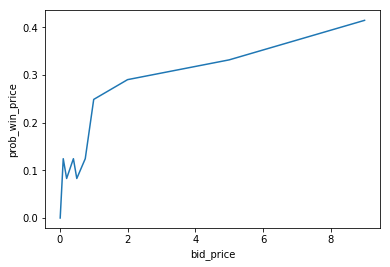

In [215]:
import matplotlib.pyplot as plt
plt.plot(df_win['bid_price'],df_win['prob_win_price'],)
plt.xlabel('bid_price')
plt.ylabel('prob_win_price')


# Problem 2

We receive money from our advertisers if we deliver them a win. Lets say that our advertiser is willing to pay $0.50 per win. This then becomes the upper bound for the bid valuation that we can submit in response to the publisher. For example, if we submit a bid response of $0.40 and we win, then the advertiser pays us $0.50, we pay $0.40 to the publisher and we made a net revenue of $0.10 .

If our goal was to maximize net revenue, what is the most optimal bid valuation we should send in our response? Use your estimations from Problem1 and all other available information.

advertiser_payment = 0.5



In [174]:
# Filtering bidding price with the upper bound amount e.g. 0.5

df_win = df_win[df_win.bid_price <= 0.5]

In [175]:
# For same number of total events -> 11221111
# Let's calculate the revenue generated against each bid price

# Step 1 : Created a dict object with key as 'bid_price' and value as 'probibility of winning at the same bidding price'

bid_price = df_win.bid_price.tolist()
prob_win_price = df_win.prob_win_price.tolist()

res = {}
for key in bid_price:
    for value in prob_win_price:
        res[str(key)] = value
        prob_win_price.remove(value)
        break  

In [176]:
res

{'0.01': 0.0,
 '0.1': 0.12440901796622454,
 '0.2': 0.08293934531081637,
 '0.4': 0.12440901796622454,
 '0.5': 0.08293934531081637}

In [177]:
# Step 2 : Reveunue generated for each bidding price

revenue = {}
for key in res:
    total_win = res[key]*total_events
    temp_rev = total_win*0.50 - total_win*float(key)
    revenue[key] = temp_rev


In [178]:
print(revenue)

{'0.01': 0.0, '0.1': 558402.96, '0.2': 279201.48, '0.4': 139600.74, '0.5': 0.0}


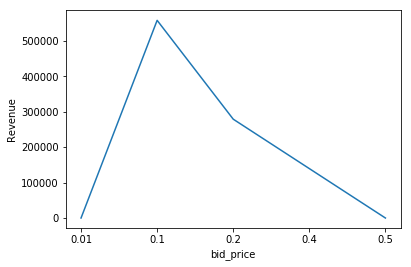

In [222]:
plt.plot(revenue.keys(),revenue.values())
plt.xlabel('bid_price')
plt.ylabel('Revenue')
plt.show()

## Maximum revenue generated at bidding price 0.1